In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('./data/dataset_cal.csv')


#Data preparation

In [9]:
X = data.iloc[:, 1:41]
y = data.iloc[:, 0]

S1 = data.loc[data['Subject'] == 'S1']
S1_X = S1.iloc[:, 1:41]
S1_y = S1.iloc[:, 0]

#Train and test datasets split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,  y_val = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

y.astype(np.float32)
X.astype(np.float32)

(38818, 40) (38818,) (25879, 40) (25879,)


,chest_ACC_x_mean,chest_ACC_y_mean,chest_ACC_z_mean,chest_ECG_mean,chest_Resp_mean,wrist_ACC_x_mean,wrist_ACC_y_mean,wrist_ACC_z_mean,wrist_EDA_mean,wrist_BVP_mean,...,wrist_EDA_median,wrist_BVP_median,wrist_TEMP_median,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks
0,0.851230,-0.066021,-0.369793,0.039022,1.320817,-0.761230,-0.076416,0.671875,4.716672,-7.619219,...,4.716672,-2.425,32.154999,78.0,1.0,34.0,182.0,3.0,6.0,0.0
1,0.853035,-0.064653,-0.372883,-0.037044,-1.524349,-0.766602,-0.076172,0.680420,4.692810,7.464063,...,4.693611,15.590,32.150002,78.0,1.0,34.0,182.0,3.0,6.0,1.0
2,0.862127,-0.063661,-0.328341,0.021329,0.497232,-0.871338,-0.362305,0.287842,4.709465,-19.324688,...,4.710907,-14.910,32.150002,78.0,1.0,34.0,182.0,3.0,6.0,0.0
3,0.884370,-0.063035,-0.265127,0.006393,0.409606,-0.979004,-0.150635,0.195068,4.748541,10.776719,...,4.748061,14.345,32.139999,78.0,1.0,34.0,182.0,3.0,6.0,0.0
4,0.889886,-0.042930,-0.247533,-0.024418,-0.779251,-1.002930,-0.099609,0.148926,4.765036,15.263047,...,4.764075,38.125,32.154999,78.0,1.0,34.0,182.0,3.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64692,0.894839,0.011158,-0.214601,-0.008444,0.712193,-0.710205,0.671631,0.156250,0.956779,-3.816328,...,0.951496,-9.900,34.014999,79.0,1.0,28.0,183.0,2.0,5.0,1.0
64693,0.895650,0.014221,-0.217153,0.000331,0.364633,-0.454102,-0.193848,0.840088,0.943969,-6.773203,...,0.941887,-6.995,34.000000,79.0,1.0,28.0,183.0,2.0,5.0,0.0
64694,0.893826,0.022179,-0.202851,0.021754,-0.179085,-0.669678,-0.124756,0.505371,0.943969,8.764375,...,0.945090,10.175,34.000000,79.0,1.0,28.0,183.0,2.0,5.0,1.0
64695,0.896889,0.022090,-0.203860,-0.013849,0.442674,-0.351074,-0.044678,0.890381,0.937724,-6.218515,...,0.939965,-6.620,34.000000,79.0,1.0,28.0,183.0,2.0,5.0,0.0


#Linear regression model

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, y_train)

y_pred_LR = regressor_LR.predict(X_val)
mae_LR = mean_absolute_error(y_val, y_pred_LR)
mae_LR

10.654677314875444

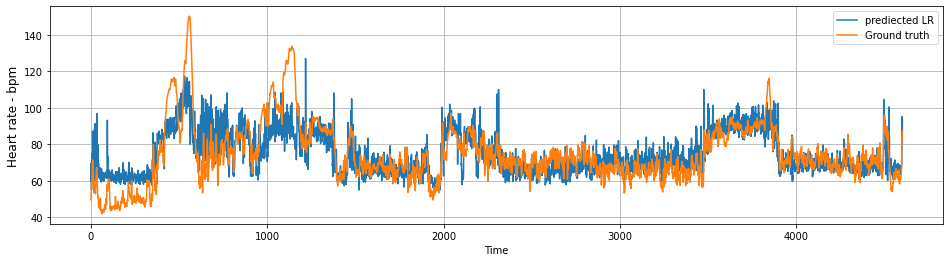

In [18]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( regressor_LR.predict(S1_X), label = 'prediected LR')
plt.plot( S1_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time')
plt.show()

In [12]:
S1_pred_LR = regressor_LR.predict(S1_X)
mean_absolute_error(S1_pred_LR, S1_y)

7.780820264213815

#SVM Model(RBF)

In [13]:
#support vector machine
from sklearn.svm import SVR
SVM_RBF = SVR(kernel = 'rbf')
SVM_RBF.fit(X_train, y_train)
y_pred_RBF = SVM_RBF.predict(X_val)
mae_RBF = mean_absolute_error(y_val, y_pred_RBF)
mae_RBF

14.563451709130176

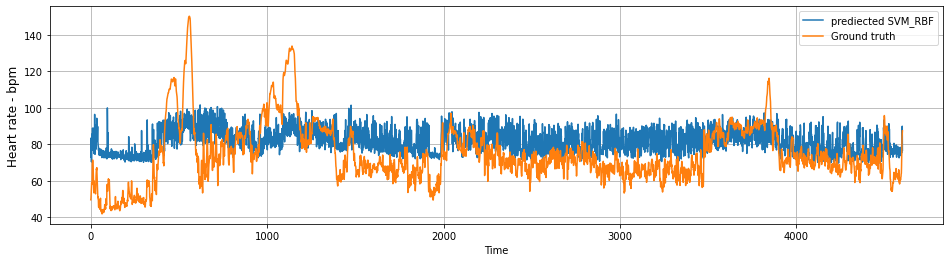

In [19]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( SVM_RBF.predict(S1_X), label = 'prediected SVM_RBF')
plt.plot( S1_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time')
plt.show()

In [14]:
S1_pred_SVM_RBF = SVM_RBF.predict(S1_X)
mean_absolute_error(S1_pred_SVM_RBF, S1_y)

12.934839808171441

#SVM Model(Linear)

In [15]:
SVM_Linear = SVR(kernel="linear")
SVM_Linear.fit(X_train, y_train)
y_pred_Linear = SVM_Linear.predict(X_val)
mae_Linear = mean_absolute_error(y_val, y_pred_Linear)
mae_Linear

10.563120768446804

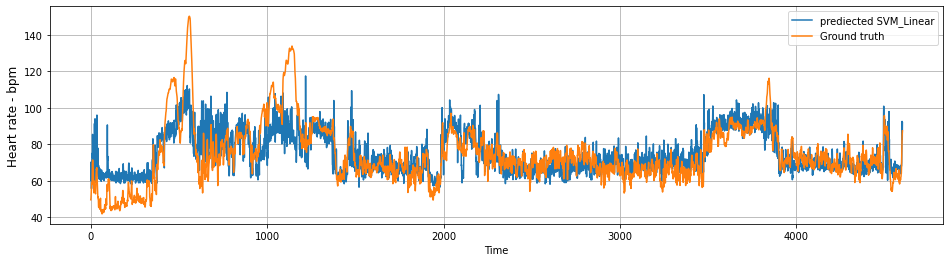

In [20]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( SVM_Linear.predict(S1_X), label = 'prediected SVM_Linear')
plt.plot( S1_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time')
plt.show()

In [16]:
S1_pred_SVM_Linear = SVM_Linear.predict(S1_X)
mean_absolute_error(S1_pred_SVM_Linear, S1_y)

7.76966684107702

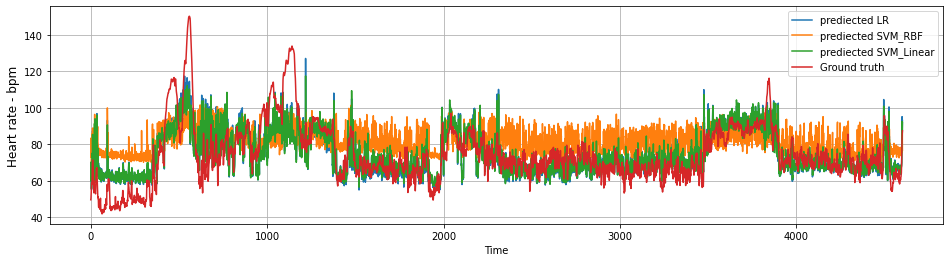

In [22]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( regressor_LR.predict(S1_X), label = 'prediected LR')
plt.plot( SVM_RBF.predict(S1_X), label = 'prediected SVM_RBF')
plt.plot( SVM_Linear.predict(S1_X), label = 'prediected SVM_Linear')
plt.plot( S1_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time')
plt.show()